# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
# %pip install numpy pandas matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import time
start_time = time.time()

Create a dataframe with ratings of genres by people :

In [4]:
ratings = np.array([[4, 2],
                    [1, 4],
                    [1, 3]])
df = pd.DataFrame(data=ratings, columns = ['Action', 'Comedy'], index = ['sai', 'navaneeth', 'harshi'])
df

,Action,Comedy
sai,4,2
navaneeth,1,4
harshi,1,3


Text(0, 0.5, 'Comedy')

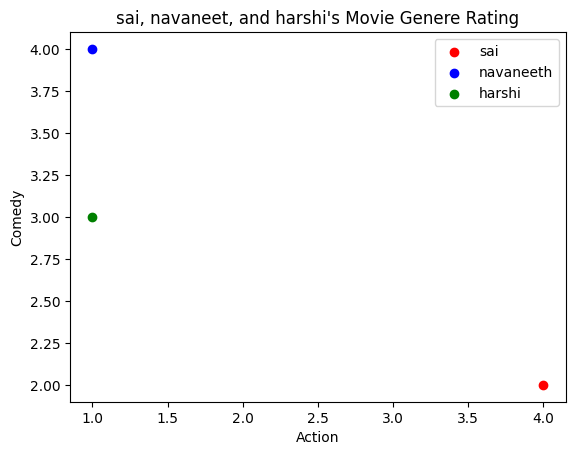

In [5]:
plt.scatter(df.loc['sai', 'Action'], df.loc['sai', 'Comedy'], color='Red', label='sai')
plt.scatter(df.loc['navaneeth', 'Action'], df.loc['navaneeth', 'Comedy'], color='Blue', label='navaneeth')
plt.scatter(df.loc['harshi', 'Action'], df.loc['harshi', 'Comedy'], color='Green', label='harshi')
plt.legend()
plt.title("sai, navaneet, and harshi's Movie Genere Rating")
plt.xlabel('Action')
plt.ylabel('Comedy')

# Scatter Plot of Movie Genre Ratings

This scatter plot visualizes the **Action** and **Comedy** movie ratings given by three users: **Sai, Navaneeth, and Harshi**.

- **Red dot** represents **Sai**'s ratings.
- **Blue dot** represents **Navaneeth**'s ratings.
- **Green dot** represents **Harshi**'s ratings.



#  Euclidean Distance

Users have rated Action and Comedy movies, we can compute the Euclidean distance between any two users based on their ratings.

In [6]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)
    
from scipy.spatial.distance import euclidean

In [7]:

print("Distance between sai and harshi:", euclidean(df.loc['sai'], df.loc['harshi']))
print("Distance bewteen navaneeth and harshi:", euclidean(df.loc['navaneeth'], df.loc['harshi']))

Distance between sai and harshi: 3.1622776601683795
Distance bewteen navaneeth and harshi: 1.0


#  Cosine Distance or Similarity
Cosine similarity measures the cosine of the angle between two vectors, indicating how similar they are.


In [8]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.sqrt(np.dot(vector1, vector1)) * np.sqrt(np.dot(vector2, vector2)))

from scipy.spatial.distance import cosine

In [9]:
print("Cosine between sai and harshi:", cosine(df.loc['sai'], df.loc['harshi']), "\n",
      "Cosine between navaneeth and harshi:", cosine(df.loc['navaneeth'], df.loc['harshi']))

Cosine between sai and harshi: 0.29289321881345254 
 Cosine between navaneeth and harshi: 0.002945514498418511


In [10]:
ratings = np.array([[4, 2, 5, 4, 3],
                    [1, 4, 3, 5, 2],
                    [1, 3, 2, 3, 1]])
df = pd.DataFrame(ratings, columns = ['Action', 'Comedy', 'Romance', 'Sci-Fi', 'Drama'], index = ['sai', 'navaneeth', 'harshi'])
df

,Action,Comedy,Romance,Sci-Fi,Drama
sai,4,2,5,4,3
navaneeth,1,4,3,5,2
harshi,1,3,2,3,1


In [11]:

print("Distance between sai and harshi:", euclidean(df.loc['sai'], df.loc['harshi']))
print("Distance bewteen navaneeth and harshi:", euclidean(df.loc['navaneeth'], df.loc['harshi']))

Distance between sai and harshi: 4.898979485566356
Distance bewteen navaneeth and harshi: 2.6457513110645907


In [12]:
print("Cosine between sai and harshi:", cosine(df.loc['sai'], df.loc['harshi']))
print("Cosine between navaneeth and harshi:", cosine(df.loc['navaneeth'], df.loc['harshi']))

Cosine between sai and harshi: 0.1460874361700334
Cosine between navaneeth and harshi: 0.009132611386275413


#  Pearson Correlation

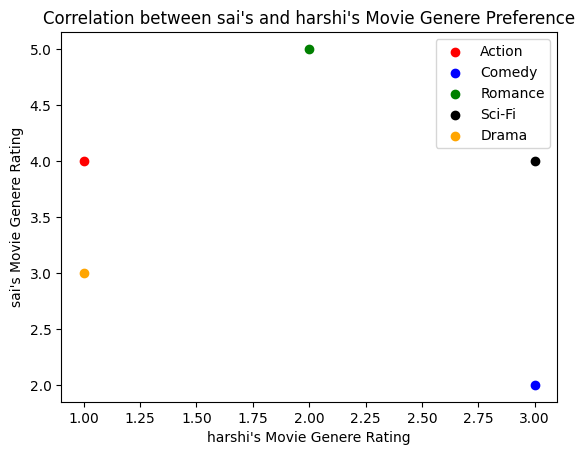

In [13]:
plt.scatter(df.loc['harshi','Action'], df.loc['sai','Action'], color='Red', label='Action')
plt.scatter(df.loc['harshi','Comedy'], df.loc['sai','Comedy'], color='Blue', label='Comedy')
plt.scatter(df.loc['harshi','Romance'], df.loc['sai','Romance'], color='Green', label='Romance')
plt.scatter(df.loc['harshi','Sci-Fi'], df.loc['sai','Sci-Fi'], color='Black', label='Sci-Fi')
plt.scatter(df.loc['harshi','Drama'], df.loc['sai','Drama'], color='Orange', label='Drama')
plt.legend()
plt.title("Correlation between sai's and harshi's Movie Genere Preference")
plt.xlabel("harshi's Movie Genere Rating")
plt.ylabel("sai's Movie Genere Rating")
plt.show()

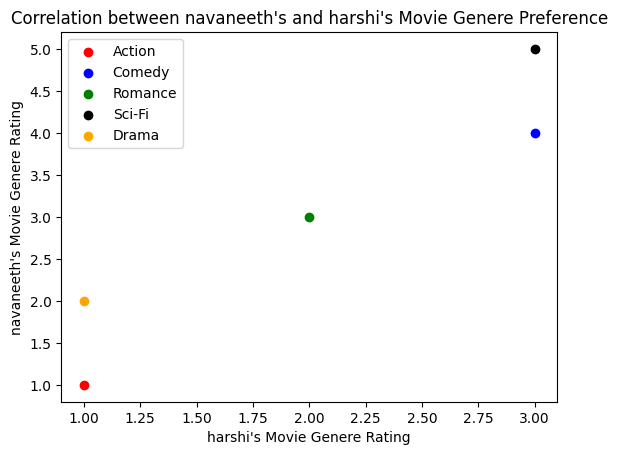

In [14]:
# Plot navaneeth's genere rating vs harshi's genere rating 
plt.scatter(df.loc['harshi', 'Action'], df.loc['navaneeth', 'Action'], color='Red', label='Action')
plt.scatter(df.loc['harshi', 'Comedy'], df.loc['navaneeth', 'Comedy'], color='Blue', label='Comedy')
plt.scatter(df.loc['harshi', 'Romance'], df.loc['navaneeth', 'Romance'], color='Green', label='Romance')
plt.scatter(df.loc['harshi', 'Sci-Fi'], df.loc['navaneeth', 'Sci-Fi'], color='Black', label='Sci-Fi')
plt.scatter(df.loc['harshi', 'Drama'], df.loc['navaneeth', 'Drama'], color='Orange', label='Drama')
plt.legend()
plt.title("Correlation between navaneeth's and harshi's Movie Genere Preference")
plt.xlabel("harshi's Movie Genere Rating")
plt.ylabel("navaneeth's Movie Genere Rating")
plt.show()

In [15]:
# Import the pearsonr funtion from the scipy.stats library
from scipy.stats import pearsonr

In [16]:
# Calulate the Pearson coefficent between each user and harshi
print("Pearson's Coefficient between sai and harshi:", pearsonr(df.loc['sai'], df.loc['harshi'])[0], "\n",
      "Pearson's Coefficient between navaneeth and harshi:", pearsonr(df.loc['navaneeth'], df.loc['harshi'])[0])

Pearson's Coefficient between sai and harshi: -0.21926450482675727 
 Pearson's Coefficient between navaneeth and harshi: 0.9486832980505138


#  Load the movielens dataset

In [17]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
pd.to_datetime(ratings['timestamp'], unit='s')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [21]:
ratings.groupby('movieId').sum()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [22]:
ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False)

,userId,rating,timestamp
movieId,,,
318,95829,1404.0,376924839127
356,101385,1370.0,386165236681
296,90621,1288.5,349204311001
2571,85236,1165.5,350270041779
593,85535,1161.0,320035674330
...,...,...,...
57326,232,0.5,1241823595
54768,219,0.5,1194931879
54934,298,0.5,1467489584


In [23]:
movies.set_index('movieId', inplace=True)

In [24]:
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
movies.loc[top_idx]


,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy
54768,Daddy Day Camp (2007),Children|Comedy
54934,"Brothers Solomon, The (2007)",Comedy


In [25]:
ind=ratings.groupby('movieId')['rating'].sum().sort_values(ascending=False)
ind

movieId
318       1404.0
356       1370.0
296       1288.5
2571      1165.5
593       1161.0
           ...  
57326        0.5
54768        0.5
54934        0.5
138798       0.5
26696        0.5
Name: rating, Length: 9724, dtype: float64

In [26]:
new_df= pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)
new_df


,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


#  Creating a simple collaborative filtering recommender

In [27]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
wide.fillna(-1, inplace=True)
cor = wide.T.corr()

In [29]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.018916,0.059204,0.179894,0.121369,0.103828,0.141187,0.130393,0.052089,0.003243,...,0.064748,0.148329,0.191966,0.058442,0.135612,0.122529,0.259260,0.268676,0.086328,0.094546
2,0.018916,1.000000,-0.002936,-0.001895,0.015369,0.015436,0.025824,0.024174,-0.003570,0.065066,...,0.199690,0.010897,-0.004286,-0.005430,-0.008081,0.011038,0.006055,0.031115,0.025154,0.087520
3,0.059204,-0.002936,1.000000,-0.002646,0.007895,0.000028,-0.006534,0.007555,-0.003594,-0.006335,...,0.006577,0.005261,0.015396,-0.005467,0.003285,0.002749,0.019761,0.015210,-0.003342,0.014557
4,0.179894,-0.001895,-0.002646,1.000000,0.122238,0.069313,0.102479,0.060439,0.002010,0.018884,...,0.077143,0.116174,0.286354,0.041942,0.062982,0.165208,0.118940,0.124587,0.024487,0.060899
5,0.121369,0.015369,0.007895,0.122238,1.000000,0.298352,0.103712,0.429288,-0.004360,0.025950,...,0.060624,0.415991,0.098957,0.262230,0.141565,0.089978,0.149544,0.129392,0.256483,0.040026


In [30]:
cor.loc[1].sort_values(ascending=False)

userId
1      1.000000
313    0.344053
266    0.342889
57     0.324486
39     0.324205
         ...   
496   -0.008249
556   -0.008840
506   -0.009832
184   -0.011859
306   -0.016454
Name: 1, Length: 610, dtype: float64

In [31]:
wide.loc[1].notna().equals(wide.loc[313].notna())

True

In [32]:
# keep the index as a column
new_df = new_df.reset_index()
new_df

,movieId,title,genres,userId,rating,timestamp
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
3,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...,...
9737,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
9738,32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
9739,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN
9740,34482,"Browning Version, The (1951)",Drama,NaN,NaN,NaN


In [33]:
#We'll print movie ids that user_1 has not watched
user_1 = 1
user_2 = 313

# Filter movies rated by User 2
user_2_ratings = new_df[(new_df['userId'] == 2) & (new_df['rating'].notna())]

# Get movies rated by User 1
user_1_rated_movies = new_df[(new_df['userId'] == 1) & (new_df['rating'].notna())]['movieId']

# Filter out movies that User 1 has rated from User 2's ratings
movies_for_user_2 = user_2_ratings[~user_2_ratings['movieId'].isin(user_1_rated_movies)]

# Display the result
print(movies_for_user_2)

      movieId                                              title       genres  \
6231   131724  The Jinx: The Life and Deaths of Robert Durst ...  Documentary   

      userId  rating     timestamp  
6231     2.0     5.0  1.445715e+09  


In [34]:
wide.fillna(-1, inplace=True)
euclidean(wide.iloc[1], wide.iloc[313])

53.66796064692602

In [35]:
from scipy.spatial.distance import pdist, squareform

In [36]:
euclidean_distances = squareform(pdist(wide, metric=euclidean)) # or metric='euclidean'

euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [37]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [38]:
euclidean_df.loc[1].sort_values()

userId
1        0.000000
493     80.851716
39      81.357237
494     81.767964
164     81.841310
          ...    
448    171.276823
610    179.904836
599    181.565415
474    203.798921
414    224.808252
Name: 1, Length: 610, dtype: float64

In [39]:
euclidean_df.loc[1].sort_values().loc[146]

np.float64(85.64899298882621)

In [40]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[1].sort_values()

userId
1      0.000000
39     0.256315
493    0.257912
96     0.262586
164    0.265731
         ...   
448    0.741735
610    0.774839
599    0.810149
474    0.862710
414    0.917347
Name: 1, Length: 610, dtype: float64

In [41]:
cosine_df.loc[1].sort_values().loc[164]

np.float64(0.2657311603412238)

#  EDA

In [42]:
print(wide.loc[1].max())
print(wide.loc[1].argmax())

5.0
43


In [43]:
# gets the column name for one of user 1's top movies, which is the movie ID
wide.columns[43]



np.int64(47)

In [44]:
movies.loc[47]

title     Seven (a.k.a. Se7en) (1995)
genres               Mystery|Thriller
Name: 47, dtype: object

In [45]:
ratings[(ratings['movieId'] == 47) & (ratings['rating'] == 5.0)]

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
1355,13,47,5.0,987895819
1392,14,47,5.0,835441133
7993,56,47,5.0,835799219
8522,58,47,5.0,847718657
9986,66,47,5.0,1093747353
15514,102,47,5.0,835876045
16218,105,47,5.0,1446571714
17915,112,47,5.0,1442535846
19590,126,47,5.0,845925822


In [46]:
wide.loc[1][wide.loc[1] == 5]

movieId
47      5.0
50      5.0
101     5.0
151     5.0
157     5.0
       ... 
3702    5.0
3703    5.0
3729    5.0
3793    5.0
5060    5.0
Name: 1, Length: 124, dtype: float64

Lastly we get their top movies

In [47]:
wide.loc[1].sort_values(ascending=False)

movieId
5060      5.0
47        5.0
3793      5.0
3729      5.0
3578      5.0
         ... 
17       -1.0
16       -1.0
15       -1.0
14       -1.0
191005   -1.0
Name: 1, Length: 9724, dtype: float64

#  Summary of Movie Recommendations & Analysis for User 2


1. Bar Chart of Movie Ratings:

   A bar chart was plotted showing the count of each unique rating given by User 2.

   The chart was sorted for better visualization using sort_index().


2. Top Movies of User 2:

   The top-rated movies were identified based on User 2's highest ratings.

   Movie titles were retrieved by merging with the movie dataset using merge().


3. Finding the Most Similar User:

   Two similarity metrics were used to find the most similar user:

      Cosine Similarity (measuring angle-based similarity)

      Euclidean Distance (measuring absolute rating differences)

  The closest user to User 2 was identified based on these metrics.


4. Movie Recommendations for User 2:

   Movies highly rated by the most similar user (but not watched by User 2) were recommended.


5. Analysis of Results:

   The recommendations were evaluated to see if they aligned with User 2’s preferences.

     Cosine Similarity was preferred because it normalizes rating patterns, making it useful for user-based collaborative filtering.

     Euclidean Distance was used for comparison, but it might not be as effective due to differences in rating scales.